# CME + Flare Locations

In [30]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sunpy.map
import astropy.units as u
import sunpy.coordinates

In [2]:
# Defining the path for the dataframe
dataframe = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe 
df = pd.read_pickle(dataframe)

In [20]:
# Gathering the CME, Flare, and Sunspot properties
cme = df[['cme_time', 'cme_angle', 'cme_speed', 'cme_halo']]
fls = df[['flare_peak_time', 'flare_string_latlon', 'goes_flux']]
spts = df[['smart_observation_time', 'smart_string_latlon', 'smart_total_area', 'smart_total_flux']]

# Removing the rows containing any NaN values
cme = cme.dropna(how='any')
fls = fls.dropna(how='any')
spts = spts.dropna(how='any')

# Re-organising the indices
cme = cme.reset_index(drop=True)
fls = fls.reset_index(drop=True)
spts = spts.reset_index(drop=True)

test = df[['flare_hg_latitude', 'flare_hg_longitude']]
test = test.dropna(how='any')
test = test.reset_index(drop=True)

test2 = df[['flare_hcx_position', 'flare_hcy_position']]
test2 = test2.dropna(how='any')
test2 = test2.reset_index(drop=True)

In [4]:
sample_map = 'C:/Users/Peter/py_projects/solar_stats/aia_sample.fits' 

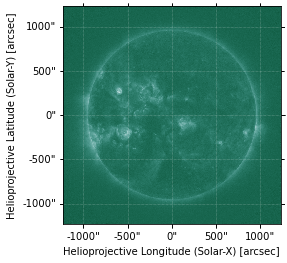

In [17]:
""" Points plotted on sample AIA sunpy data which has been provided (alternatively could use the sunpy AIA data sample) """
# Load a sample map
sunmap = sunpy.map.Map(sample_map)
#sunmap.data[:,:]=[500.]
sunmap.plot()

AttributeError: module 'sunpy.coordinates' has no attribute 'convert_hgs_hpc'

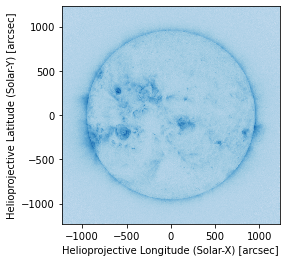

In [32]:
# Some needed parameters
jb0 = sunmap.heliographic_latitude.value * u.deg
cm = plt.cm.get_cmap('viridis')

# Set up plot
fig, ax = plt.subplots()
sunmap.plot(title = '', cmap = 'Blues')
#sunmap.draw_grid(color = 'k', lw = 0.5)

# Overplot points
for i in range(len(test.flare_hg_latitude)):
    sc = sunpy.coordinates.convert_hgs_hpc(test.flare_hg_latitude.iloc[i], test.flare_hg_longitude.iloc[i],
                                  b0_deg=jb0, l0_deg=0, angle_units='arcsec')
    plt.scatter(sc[0], sc[1], c=colors[i],
                s=50, cmap=cm,
                vmin=min(colors), vmax=max(colors),
                linewidth=0.0)